In [ ]:
import os

base_path = "/content/drive/MyDrive/drowsiness_project/train"
print("Folders found:", os.listdir(base_path))


Folders found: ['Closed', 'Open', 'no_yawn', 'yawn']


In [3]:

import numpy as np
import pandas as pd
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
labels = os.listdir("/content/drive/MyDrive/drowsiness_project/train")

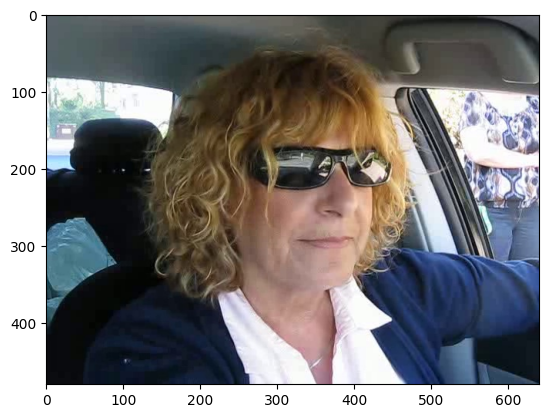

In [ ]:
plt.imshow(plt.imread("/content/drive/MyDrive/drowsiness_project/train/no_yawn/1003.jpg"))

In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/drowsiness_project/file.xml"))


True


In [ ]:
def detecting_face():
    face = []
    links = [
        '/content/drive/MyDrive/drowsiness_project/train/yawn',
        '/content/drive/MyDrive/drowsiness_project/train/no_yawn'
    ]

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    for link in links:
        index=links.index(link)
        print(link,index)
        for image in os.listdir(link):
                image_array = cv2.imread(os.path.join(link, image), cv2.IMREAD_COLOR)
                faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
                for (x, y, w, h) in faces:
                    img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                    roi_color = img[y:y+h, x:x+w]
                    ne_array = cv2.resize(roi_color, (145, 145))
                    face.append([ne_array, index])
    return face


    faceonly =detecting_face()

In [ ]:
def eye():
    data = []
    n_links=['/content/drive/MyDrive/drowsiness_project/train/Closed','/content/drive/MyDrive/drowsiness_project/train/Open']
    for n_link in n_links:
        n_index=n_links.index(n_link)
        n_index+=2
        print(n_link,n_index)
        for img in os.listdir(n_link):
          img_array = cv2.imread(os.path.join(n_link, img), cv2.IMREAD_COLOR)
          n_array = cv2.resize(img_array, (145, 145))
          data.append([n_array, n_index])
    return data

In [ ]:
def provide_data():
    yaw_no = detecting_face()
    data = eye()
    yaw_no.extend(data)
    return np.array(yaw_no, dtype = object)

In [ ]:
new_data = provide_data()

/content/drive/MyDrive/drowsiness_project/train/yawn 0
/content/drive/MyDrive/drowsiness_project/train/no_yawn 1
/content/drive/MyDrive/drowsiness_project/train/Closed 2
/content/drive/MyDrive/drowsiness_project/train/Open 3


In [ ]:
X_val = []
y_val = []


for feature, label in new_data:
    X_val.append(feature)
    y_val.append(label)
X = np.array(X_val)
X = X.reshape(-1, 145, 145, 3)
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y_val)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.35)

In [ ]:
print("The length of training set is ",len(X_train))
print("The length of testing set is ",len(y))

The length of training set is  1068
The length of testing set is  1644


In [ ]:
rescale=1/255
zoomrange=0.2
rotationrange=30
print("The properties are decided as follows ",)
print("The rescale as",rescale)
print("The zoomrange as",zoomrange)
print("The rotation range as",rotationrange)

The properties are decided as follows 
The rescale as 0.00392156862745098
The zoomrange as 0.2
The rotation range as 30


In [ ]:
train_data = ImageDataGenerator(rescale=rescale, zoom_range=zoomrange, horizontal_flip=True, rotation_range=rotationrange)
test_data = ImageDataGenerator(rescale=1/255)

train_data = train_data.flow(np.array(X_train), y_train, shuffle=False)
test_data = test_data.flow(np.array(X_test), y_test, shuffle=False)

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 143, 143, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 71, 71, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 69, 69, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,140 (1.89 MB)

 Trainable params: 495,140 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
steps = model.fit(train_data, epochs=20, validation_data=test_data, shuffle=True, validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 28s 479ms/step - accuracy: 0.3785 - loss: 1.3162 - val_accuracy: 0.5538 - val_loss: 1.1009
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.6941 - loss: 0.7200 - val_accuracy: 0.7674 - val_loss: 0.5256
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.8062 - loss: 0.4922 - val_accuracy: 0.7778 - val_loss: 0.4578
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.8050 - loss: 0.3930 - val_accuracy: 0.8090 - val_loss: 0.4325
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.8538 - loss: 0.3195 - val_accuracy: 0.8507 - val_loss: 0.2818
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.8629 - loss: 0.3251 - val_accuracy: 0.8455 - val_loss: 0.3327
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 0.8705 - loss: 0.2928 - val_accuracy: 0.8889 - val_loss: 0.2833
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.8883 - loss: 0.2640 - val_accuracy: 

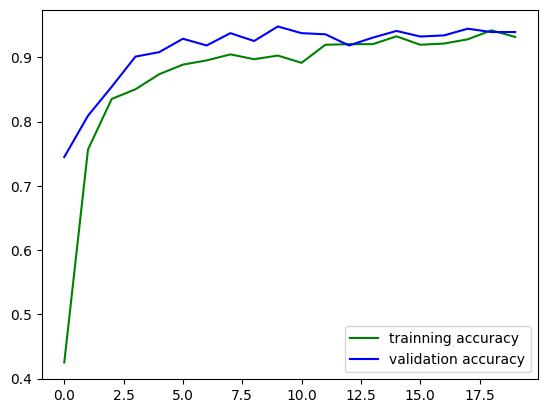

In [ ]:
accu = steps.history['accuracy']
val_accu = steps.history['val_accuracy']
epochs = range(len(accu))

plt.plot(range(len(accu)), accu, "g", label="trainning accuracy")
plt.plot(range(len(accu)), val_accu, "b", label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
final_prediction = np.argmax(model.predict(X_test), axis=-1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [ ]:
final_prediction

array([2, 3, 3, 2, 2, 3, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3,
       3, 2, 1, 2, 2, 2, 3, 0, 3, 0, 0, 1, 2, 3, 3, 1, 0, 3, 1, 2, 2, 0,
       1, 3, 2, 2, 1, 1, 1, 3, 2, 2, 3, 2, 1, 2, 1, 2, 3, 1, 2, 0, 1, 0,
       3, 1, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 3, 1, 3, 3, 2,
       3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 3,
       1, 2, 1, 2, 3, 3, 3, 2, 3, 3, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 3, 3, 0, 0, 2, 2, 2, 3, 3, 1, 3, 1, 0, 2, 1,
       0, 1, 3, 3, 1, 3, 0, 2, 3, 3, 3, 1, 3, 2, 3, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 1,
       1, 2, 3, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 1, 3, 3, 2, 1, 2, 3, 0, 3,
       3, 3, 0, 2, 2, 2, 2, 3, 1, 2, 2, 3, 1, 3, 0, 1, 2, 3, 1, 2, 2, 2,
       1, 3, 2, 3, 1, 1, 0, 3, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 2, 2, 3, 3, 2, 2, 3, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 2, 2, 2, 2,
       1, 3, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2,

In [ ]:
labels = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), final_prediction, target_names=labels))

              precision    recall  f1-score   support

        yawn       0.86      0.58      0.69        66
     no_yawn       0.70      0.92      0.80        78
      Closed       0.84      0.99      0.91       212
        Open       1.00      0.81      0.90       220

    accuracy                           0.87       576
   macro avg       0.85      0.83      0.82       576
weighted avg       0.88      0.87      0.86       576



In [ ]:
model.save('/content/drive/MyDrive/drowsiness_project/model_tf2.h5')

In [13]:
from tensorflow.keras.models import load_model

# ModEL loading
new_model = load_model('/content/drive/MyDrive/drowsiness_project/model_tf2.h5')

# Prediction function
def to_predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img = img / 255.0
    new_array = cv2.resize(img, (145, 145))
    new_array = new_array.reshape(-1, 145, 145, 3)
    prediction = new_model.predict(new_array)
    print(prediction)
    val = np.argmax(prediction)
    return val

# Testing
val = to_predict("/content/drive/MyDrive/drowsiness_project/train/no_yawn/1003.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
[[0.15809993 0.13262    0.70586693 0.00341313]]


In [14]:
if(val==0):
  print("The person is much sleepy at yellow level")
elif(val==2):
  print("The person is sleepy at red level")
else:
  print("The person is not at all sleepy.")


The person is sleepy at red level


In [48]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the model once
model = tf.keras.models.load_model("/content/drive/MyDrive/drowsiness_project/model_tf2.h5")
labels = ['yawn', 'no_yawn', 'Closed', 'Open']

def predict_if_sleepy(filepath):
    # Read and preprocess
    img = cv2.imread(filepath, cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img = img / 255.0
    img = cv2.resize(img, (145, 145))
    img = img.reshape(-1, 145, 145, 3)

    # Predict
    prediction = model.predict(img)
    prediction = prediction.flatten()
    val = np.argmax(prediction)

    print("Prediction scores:", prediction)
    print("Predicted class:", labels[val])

    # Decision logic
    if labels[val] == 'yawn' and labels[np.argmax(prediction[2:])] == 'Closed':
        print("The person is much sleepy at red level.")
    elif labels[val] == 'yawn':
        print("The person is yawning but eyes are not fully closed.")
    elif labels[val] == 'Closed':
        print("Closed Eyes — Possible Sleepiness.")
    else:
        print("The person is not at all sleepy.")

    return labels[val]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
Prediction scores: [5.1325965e-01 4.2925397e-01 5.7430517e-02 5.5938366e-05]
Predicted class: yawn
The person is yawning but eyes are not fully closed.


np.int64(0)

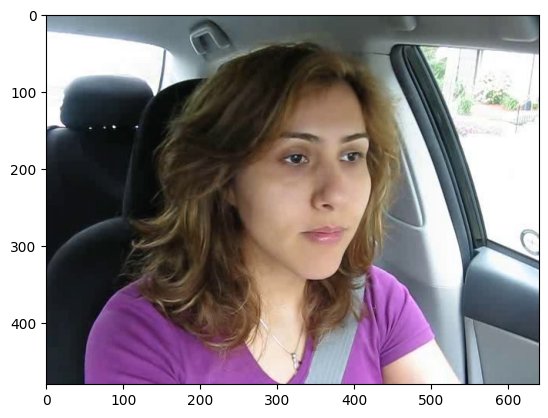

In [47]:
predict_if_sleepy("/content/drive/MyDrive/drowsiness_project/test/no_yawn/771.jpg")

In [17]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [35]:
from google.colab.output import eval_js
from IPython.display import Javascript, display
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js(f'takePhoto({float(quality)})')
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [44]:
image_file = take_photo()

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
Prediction scores: [3.6998088e-07 1.5909099e-07 5.3827749e-03 9.9461669e-01]
Predicted class: Open
The person is not at all sleepy.


'Open'

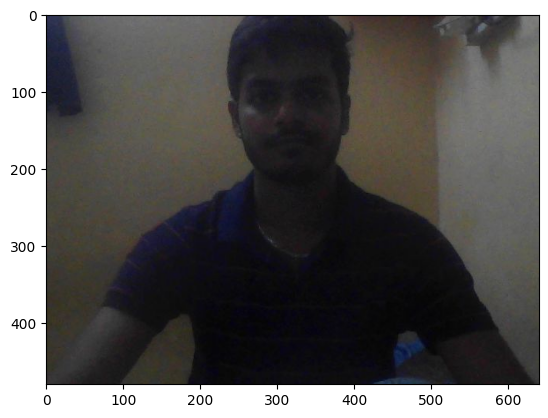

In [45]:
predict_if_sleepy(image_file)